# Probability density matrix 

 In this notebook we show how to call the probability densitity matrix for arbitrary NSI

First import the model class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from snudd.models import GeneralNSI

We will start with the Standard Model (SM), i.e. all NSI parameters are set to zero.

In [2]:
SM_matrix = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])

eta = 0
phi = 0

sm_model = GeneralNSI(SM_matrix, eta, phi)

We import the probabilities module

In [3]:
import snudd.nsi.nsi_probabilities as probs

Declare neutrino energy array 

In [4]:
enus = np.geomspace(1e-6,1e0,200)

## Neutrino survival and dissapearance probabilities

For example, to call the $\nu_{e}$ survival probabilities 

In [5]:
probs.ProbabilityCalculator(sm_model).prob_ee_3nu(enus, '8B') # Survival

array([0.54209555, 0.5420936 , 0.54209152, 0.54208928, 0.54208688,
       0.54208431, 0.54208156, 0.5420786 , 0.54207544, 0.54207205,
       0.54206841, 0.54206451, 0.54206033, 0.54205585, 0.54205105,
       0.5420459 , 0.54204039, 0.54203447, 0.54202813, 0.54202134,
       0.54201405, 0.54200624, 0.54199787, 0.5419889 , 0.54197928,
       0.54196897, 0.54195792, 0.54194607, 0.54193337, 0.54191975,
       0.54190515, 0.54188951, 0.54187273, 0.54185475, 0.54183547,
       0.5418148 , 0.54179265, 0.54176889, 0.54174343, 0.54171613,
       0.54168686, 0.54165548, 0.54162183, 0.54158576, 0.54154708,
       0.54150561, 0.54146115, 0.54141347, 0.54136235, 0.54130753,
       0.54124874, 0.54118571, 0.5411181 , 0.54104561, 0.54096785,
       0.54088447, 0.54079503, 0.54069909, 0.54059619, 0.54048581,
       0.54036739, 0.54024036, 0.54010406, 0.53995782, 0.5398009 ,
       0.53963251, 0.53945179, 0.53925783, 0.53904964, 0.53882615,
       0.53858621, 0.53832859, 0.53805195, 0.53775485, 0.53743

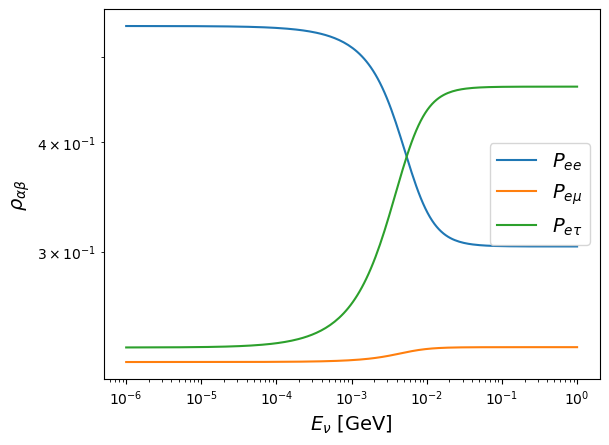

In [6]:
plt.loglog(enus, 
           probs.ProbabilityCalculator(sm_model).prob_ee_3nu(enus, '8B'), label=r'$P_{ee}$')

plt.loglog(enus, 
           probs.ProbabilityCalculator(sm_model).prob_emu_3nu(enus, '8B'), label=r'$P_{e\mu}$')

plt.loglog(enus, 
           probs.ProbabilityCalculator(sm_model).prob_etau_3nu(enus, '8B'), label=r'$P_{e\tau}$' )



plt.ylabel(r'$\rho_{\alpha\beta}$', size=14)
plt.xlabel(r'$E_{\nu}\,\,\left[{\rm GeV}\right]$', size=14)

plt.legend(fontsize=14)


## Neutrino density matrix $\rho$

Now we use the more general probability density matrix as in equation (1) of our [paper](https://inspirehep.net/literature/2636793)

$$\frac{\rm{d}R}{\rm{d}E_R}=  N_T \int_{E_\nu^\mathrm{min}} \frac{\rm{d}\phi_\nu}{\rm{d}E_\nu}\,  \mathrm{Tr}\left[ \rho\, \frac{\rm{d}\zeta}{ \rm{d}E_R}\right] \, \rm{d} E_\nu\, .$$

We can call this matrix in a similar way to before 

In [7]:
density_sm = probs.DensityMatrixCalculator(sm_model).density(enus, '8B')

The output is an array of $n\times3\times3$ matrix, where $n$ is the length of $E_\nu$  

In [8]:
np.shape(density_sm)

(200, 3, 3)

For comparison we can plot the diagonal denisty matrix elements against the survival and disappearance probabilities from before.

Text(0.5, 0, '$E_{\\nu}\\,\\,\\left[{\\rm GeV}\\right]$')

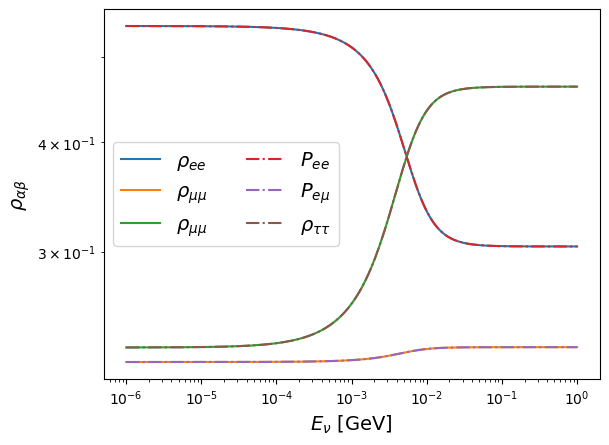

In [9]:
plt.loglog(enus,abs(density_sm[:, 0,0]),  label=r'$\rho_{ee}$')
plt.loglog(enus,abs(density_sm[:, 1,1]),  label=r'$\rho_{\mu\mu}$')

plt.loglog(enus,abs(density_sm[:, 2,2]),  label=r'$\rho_{\mu\mu}$')


plt.loglog(enus, 
           probs.ProbabilityCalculator(sm_model).prob_ee_3nu(enus, '8B'),
           label=r'$P_{ee}$', ls='-.')

plt.loglog(enus, 
           probs.ProbabilityCalculator(sm_model).prob_emu_3nu(enus, '8B'),
           label=r'$P_{e\mu}$', ls='-.')

plt.loglog(enus, 
           probs.ProbabilityCalculator(sm_model).prob_etau_3nu(enus, '8B'),
           label=r'$\rho_{\tau\tau}$', ls='-.' )

plt.ylabel(r'$\rho_{\alpha\beta}$', size=14)
plt.legend(fontsize=14, ncol=2)
plt.xlabel(r'$E_{\nu}\,\,\left[{\rm GeV}\right]$', size=14)

For completness, let us plot all six independent density matrix elements.

Text(0.5, 0, '$E_{\\nu}\\,\\,\\left[{\\rm GeV}\\right]$')

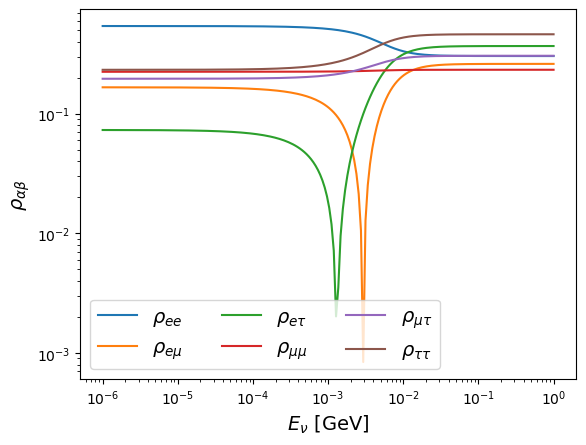

In [10]:
plt.loglog(enus,abs(density_sm[:, 0,0]),  label=r'$\rho_{ee}$')
plt.loglog(enus,abs(density_sm[:, 0,1]),  label=r'$\rho_{e\mu}$')
plt.loglog(enus,abs(density_sm[:, 0,2]),  label=r'$\rho_{e\tau}$')
plt.loglog(enus,abs(density_sm[:, 1,1]),  label=r'$\rho_{\mu\mu}$')
plt.loglog(enus,abs(density_sm[:, 1,2]),  label=r'$\rho_{\mu\tau}$')
plt.loglog(enus,abs(density_sm[:, 2,2]),  label=r'$\rho_{\tau\tau}$')


plt.legend(fontsize=14, ncol=3)

plt.ylabel(r'$\rho_{\alpha\beta}$', size=14)
plt.xlabel(r'$E_{\nu}\,\,\left[{\rm GeV}\right]$', size=14)

## Adding NSI

Now we can calculate the density matrix with nonzero NSI parameters. For example with $\varepsilon_{\mu\tau}=0.1$ with equal couplings to protons and neutrons ($\eta=\pi/4$).

In [11]:
NSI_matrix = np.array([[0.0, 0.0, 0.0],
                       [0.0, 0.0, 0.1],
                       [0.0, 0.1, 0.0]])

eta = np.pi/4
phi = 0

NSI_model = GeneralNSI(NSI_matrix, eta, phi)

In [12]:
density_NSI = probs.DensityMatrixCalculator(NSI_model).density(enus, '8B')

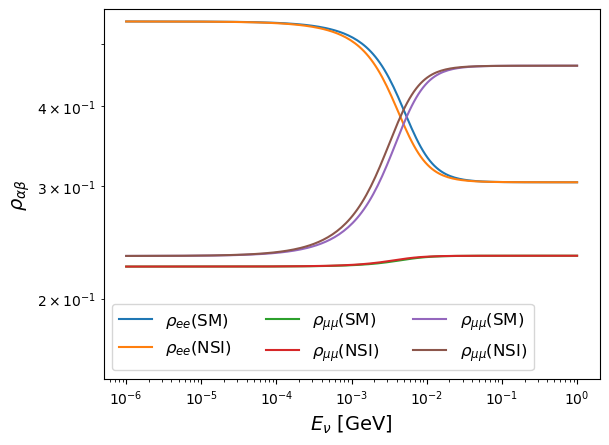

In [13]:
plt.plot(enus,abs(density_sm[:, 0,0]),  label=r'$\rho_{ee} ({\rm SM})$')
plt.loglog(enus,abs(density_NSI[:, 0,0]),  label=r'$\rho_{ee}({\rm NSI})$')

plt.loglog(enus,abs(density_sm[:, 1,1]),  label=r'$\rho_{\mu\mu}({\rm SM})$')
plt.loglog(enus,abs(density_NSI[:, 1,1]),  label=r'$\rho_{\mu\mu}({\rm NSI})$')


plt.loglog(enus,abs(density_sm[:, 2,2]),  label=r'$\rho_{\mu\mu}({\rm SM})$')



plt.loglog(enus,abs(density_NSI[:, 2,2]),  label=r'$\rho_{\mu\mu}({\rm NSI})$')


plt.ylabel(r'$\rho_{\alpha\beta}$', size=14)
plt.xlabel(r'$E_{\nu}\,\,\left[{\rm GeV}\right]$', size=14)

plt.ylim(ymin=1.5e-1)
plt.legend(fontsize=12, ncol=3)